In [2]:
import os
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

In [3]:
ab_train = pd.read_excel('IrisData/ab20_train_100.xlsx') # pd默认将第一行作为标题
ab_test = pd.read_excel('IrisData/irisAB_test_80.xlsx')

In [4]:
ab_train_1 = ab_train[ab_train.columns[0:100][0]]
ab_train_2 = ab_train[ab_train.columns[0:100][1]]
ab_train_3 = ab_train[ab_train.columns[0:100][2]]
ab_train_4 = ab_train[ab_train.columns[0:100][3]]
print(ab_train_1)

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
     ... 
95    5.7
96    5.5
97    6.1
98    5.8
99    5.0
Name: Unnamed: 0, Length: 100, dtype: float64


In [5]:
# 标准化函数
def Standard(x):
    """Z-score normaliaztion"""
    y = (x-np.mean(x))/(np.std(x))
    return y

In [6]:
# N模归一化函数
def norm_2_N(data,N):
    norm = sum(data*data)
    data1 = data*np.sqrt(N)/np.sqrt(norm)
    return data1

In [7]:
data = []
standard_data = []
ab_train_1 = Standard(ab_train_1)
ab_train_2 = Standard(ab_train_2)
ab_train_3 = Standard(ab_train_3)
ab_train_4 = Standard(ab_train_4)
for i in range(100):
    s = [ab_train_1[i],ab_train_2[i],ab_train_3[i],ab_train_4[i]]
    data.append(s)
    #sd = Standard([s])
    #standard_data.append(sd)

print(data)

[[-0.297335911724074, 1.2368833728721744, -1.00425963143213, -1.0220218487895094], [-0.6937837940228369, -0.05153680720300851, -1.00425963143213, -1.0220218487895094], [-1.0902316763216016, 0.4638312648270651, -1.079204380046468, -1.0220218487895094], [-1.288455617470985, 0.2061472288120283, -0.9293148828177918, -1.0220218487895094], [-0.49555985287345544, 1.4945674088872112, -1.00425963143213, -1.0220218487895094], [0.49555985287345544, -1.0822729512631546, 1.2440828269980115, 0.9246864346190794], [1.6849034997697478, -0.05153680720300851, 1.393972324226687, 1.3140280913007971], [1.0902316763216016, -1.0822729512631546, 0.9443038325406591, 0.9246864346190794], [-0.49555985287345544, -1.855325059308265, 0.4196905922402927, 0.5353447779373618], [0.6937837940228369, -0.8245889152481178, 1.0941933297693354, 1.1193572629599384], [-0.6937837940228369, -0.05153680720300851, -1.00425963143213, -1.0220218487895094], [-1.0902316763216016, 0.4638312648270651, -1.079204380046468, -1.0220218487895

In [8]:
norm = []
for i in range(100):
    s = norm_2_N(np.array(data[i]),0.8)
    norm.append(s)
print(norm)

[tensor([-0.13879671,  0.57737841, -0.46878942, -0.47708084], requires_grad=True), tensor([-0.38958654, -0.02893992, -0.56393078, -0.57390495], requires_grad=True), tensor([-0.51301787,  0.21825978, -0.50782888, -0.48092115], requires_grad=True), tensor([-0.60647734,  0.09703371, -0.43742944, -0.4810667 ], requires_grad=True), tensor([-0.20819873,  0.6279101 , -0.42191792, -0.42938033], requires_grad=True), tensor([ 0.2267919 , -0.49529989,  0.56935183,  0.42318076], requires_grad=True), tensor([ 0.59058628, -0.0180645 ,  0.48861014,  0.46058837], requires_grad=True), tensor([ 0.48119227, -0.47767955,  0.41678454,  0.40812607], requires_grad=True), tensor([-0.21756476, -0.81454006,  0.18425601,  0.23503147], requires_grad=True), tensor([ 0.32653157, -0.38809542,  0.51498561,  0.5268291 ], requires_grad=True), tensor([-0.38958654, -0.02893992, -0.56393078, -0.57390495], requires_grad=True), tensor([-0.51301787,  0.21825978, -0.50782888, -0.48092115], requires_grad=True), tensor([-0.6064

In [15]:
def RBS(on_wire, theta):
    if type(on_wire) is tuple:
        qml.Hadamard(wires=on_wire[0])
        qml.Hadamard(wires=on_wire[1])
        qml.CZ(wires=on_wire)
        qml.RY(+theta, wires=on_wire[0])
        qml.RY(-theta, wires=on_wire[1])
        qml.CZ(wires=on_wire)
        qml.Hadamard(wires=on_wire[0])
        qml.Hadamard(wires=on_wire[1])
    else:
        raise('RBS作用线路编号为元组形式')

In [18]:
dev = qml.device('default.qubit', wires=[0,1,2,3,'aux']) # 定义量子模拟器,包含自动微分模式

@qml.qnode(dev)
def layer_42_state(params):
    # 装载初始数据
    # 拥有五条线路，最下面一条是辅助量子比特
    # qml.QubitStateVector(ini_state
    #                     ,wires=[0,1,2,3,'aux'])
    # 金字塔电路主体
    RBS((0, 1), params[0])
    #qml.Snapshot("zeta_0")
    RBS((1, 2), params[1])
    #qml.Snapshot("zeta_1")
    RBS((0, 1), params[2])
    #qml.Snapshot("zeta_2")
    RBS((2, 3), params[3])
    #qml.Snapshot("zeta_3")
    RBS((1, 2), params[4])
    #qml.Snapshot("zeta_4")
    return qml.state()


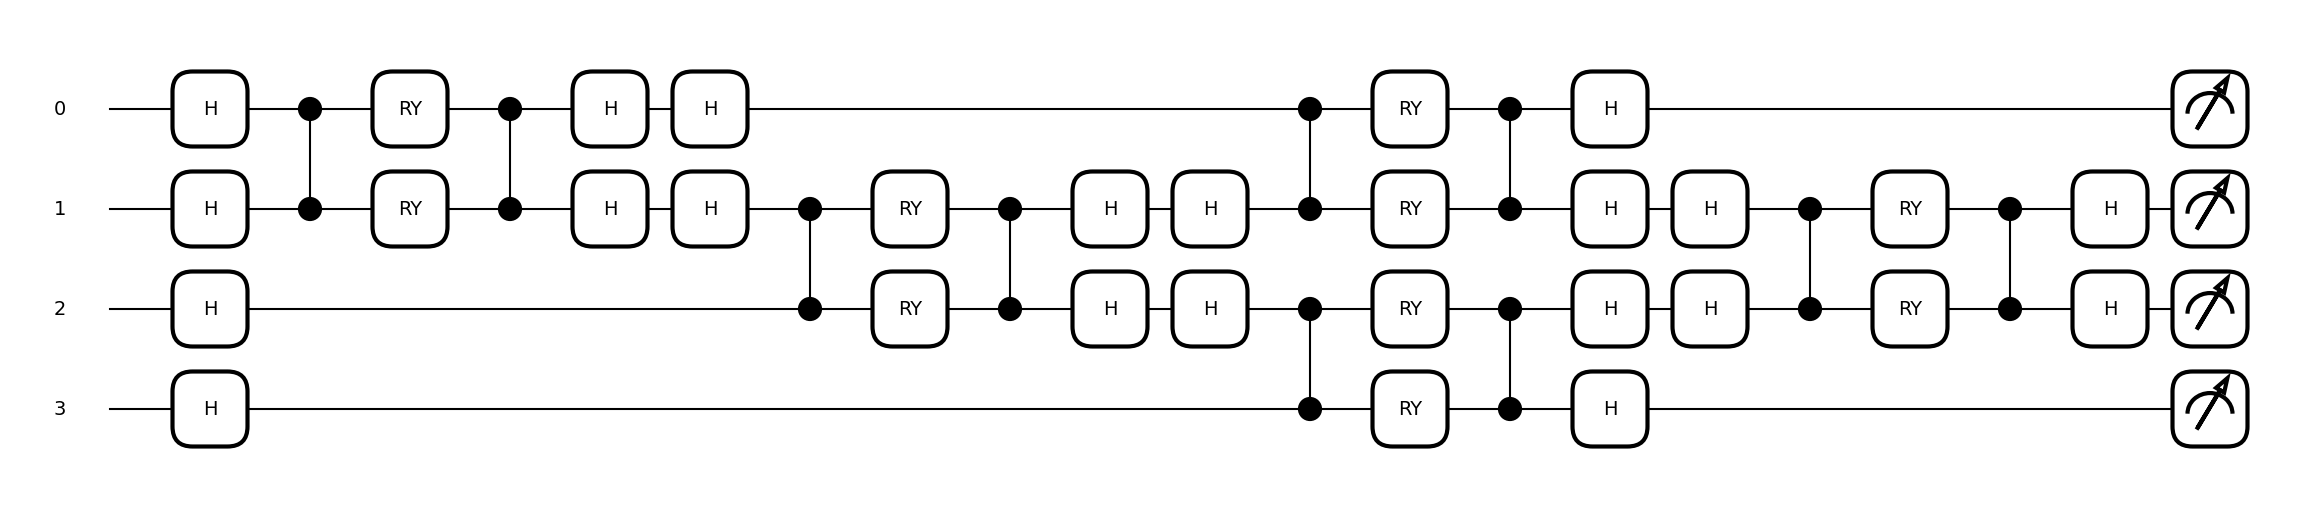

In [19]:
param = np.array([1.80, 2.34, 2., 2.00, 1.61]) # 初始化参数
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(layer_42_state)(param)
plt.show()